In [ ]:
%pip install -q accelerate "optimum-intel[openvino,diffusers]"@git+https://github.com/huggingface/optimum-intel.git

In [1]:
import warnings
warnings.filterwarnings('ignore')

100%|███████████████████████████████████████████| 17/17 [00:38<00:00,  2.28s/it]


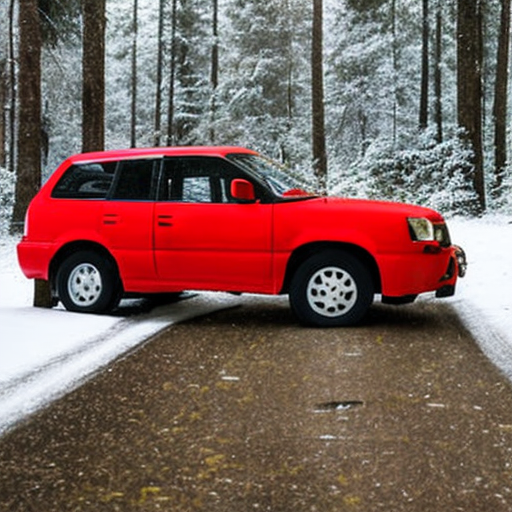

In [2]:
from diffusers import StableDiffusionPipeline

model_id = "stabilityai/stable-diffusion-2-1-base"
pipe = StableDiffusionPipeline.from_pretrained(model_id)
pipe.save_pretrained("./stabilityai_cpu")
prompt = "red car in snowy forest"
output_cpu = pipe(prompt, num_inference_steps=17).images[0]
output_cpu.save("image_cpu.png")
output_cpu

We found an newer version of diffusers 0.17.1 but we require diffusers to be < 0.17.0.
Framework not specified. Using pt to export to ONNX.
Keyword arguments {'subfolder': '', 'config': {'_class_name': 'StableDiffusionPipeline', '_diffusers_version': '0.10.0.dev0', 'feature_extractor': ['transformers', 'CLIPImageProcessor'], 'requires_safety_checker': False, 'safety_checker': [None, None], 'scheduler': ['diffusers', 'PNDMScheduler'], 'text_encoder': ['transformers', 'CLIPTextModel'], 'tokenizer': ['transformers', 'CLIPTokenizer'], 'unet': ['diffusers', 'UNet2DConditionModel'], 'vae': ['diffusers', 'AutoencoderKL']}} are not expected by StableDiffusionPipeline and will be ignored.
Using framework PyTorch: 2.0.1+cu117


============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



Using framework PyTorch: 2.0.1+cu117
Saving external data to one file...


============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



Using framework PyTorch: 2.0.1+cu117
Using framework PyTorch: 2.0.1+cu117


============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



Compiling the text_encoder...
Compiling the vae_decoder...
Compiling the unet...
100%|███████████████████████████████████████████| 18/18 [00:30<00:00,  1.68s/it]


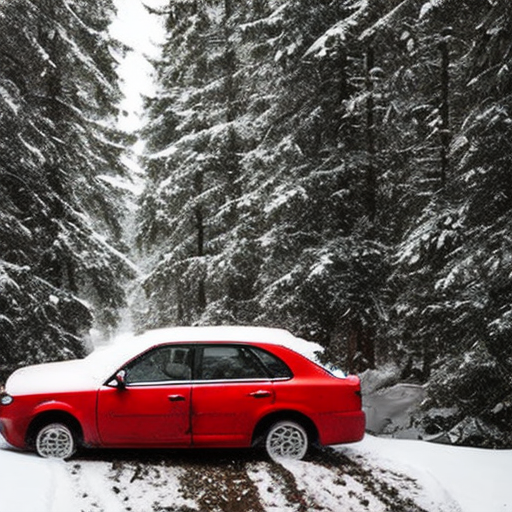

In [3]:
from optimum.intel.openvino import OVStableDiffusionPipeline

model_id = "stabilityai/stable-diffusion-2-1-base"
ov_pipe = OVStableDiffusionPipeline.from_pretrained(model_id, export=True, compile=False)
ov_pipe.reshape(batch_size=1, height=512, width=512, num_images_per_prompt=1)
ov_pipe.save_pretrained("./openvino_ir")
ov_pipe.compile()
prompt = "red car in snowy forest"
output_cpu_ov = ov_pipe(prompt, num_inference_steps=17).images[0]
output_cpu_ov.save("image_ov_cpu.png")
output_cpu_ov

Compiling the text_encoder...
Compiling the vae_decoder...
Compiling the unet...
100%|███████████████████████████████████████████| 18/18 [00:01<00:00, 10.92it/s]


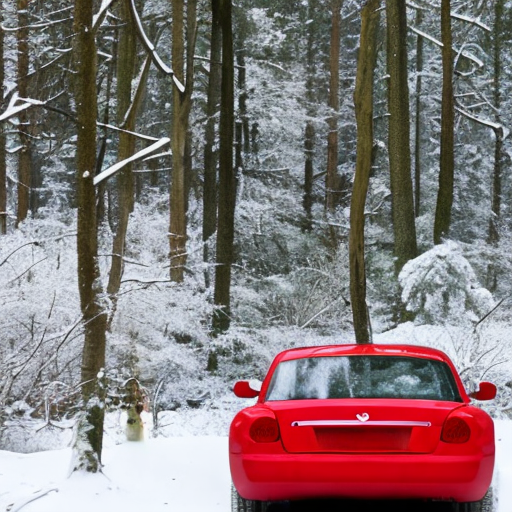

In [4]:
#from optimum.intel.openvino import OVStableDiffusionPipeline
#ov_pipe = OVStableDiffusionPipeline.from_pretrained("./openvino_ir"")
ov_pipe.to("GPU.1")
ov_pipe.compile()
prompt = "red car in snowy forest"
output_gpu_ov = ov_pipe(prompt, num_inference_steps=17).images[0]
output_gpu_ov.save("image_ov_gpu.png")
output_gpu_ov